<a href="https://colab.research.google.com/github/rajeevak40/Retail_Analytics/blob/main/Customer_Predictive_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle



# Data Preparation

In [ ]:
# Loading data
df_purchase=pd.read_csv('/content/drive/MyDrive/Retail/purchase data.csv', index_col=0)

# importing pickel files
scaler= pickle.load(open('/content/drive/MyDrive/Retail/scaler.pickle','rb'))
pca= pickle.load(open('/content/drive/MyDrive/Retail/pca.pickle','rb'))
kmean_pca= pickle.load(open('/content/drive/MyDrive/Retail/kmean_pca.pickle','rb'))

# Column Filtering
df_features= df_purchase[['Sex', 'Marital status', 'Age','Education', 'Income', 'Occupation', 'Settlement size']]

# Scaling Data
df_purchase_segm_std=scaler.transform(df_features)


# PCA fitting
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

# KMeans Clustering
purchase_segm_pca_kmean = kmean_pca.predict(df_purchase_segm_pca)

# Create Purchase Predictor dataset 
df_purchase_predictors= df_purchase.copy()
df_purchase_predictors['Segment']= purchase_segm_pca_kmean

segment_dummies = pd.get_dummies(purchase_segm_pca_kmean, prefix='Segment', prefix_sep='_')
df_purchase_predictors= df_purchase_predictors.reset_index()
df_purchase_predictors=pd.concat([df_purchase_predictors, segment_dummies], axis=1)


In [ ]:
df_purchase_predictors.head()


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2,0,0,1,0


In [ ]:
df_purchase_predictors['Segment'].unique()

array([2, 3, 1, 0], dtype=int32)

# Purchase Probability Modeling
Check the impect of price in puchase decision and compute the magnitude of impact of price on price. 

Use of Logistic Regression will be better choice in this case.


In [ ]:
Y=df_purchase_predictors['Incidence']
x=pd.DataFrame()
x['Mean']=(df_purchase_predictors['Price_1']+df_purchase_predictors['Price_2']+df_purchase_predictors['Price_3']+df_purchase_predictors['Price_4']+df_purchase_predictors['Price_5'])/5
model_purchase = LogisticRegression()
model_purchase.fit(x,Y)

LogisticRegression()

In [ ]:
model_purchase.coef_

array([[-2.3480548]])

# Price Elasticity of Purchase Probability

In [ ]:
#Check on the price range
df_purchase_predictors[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [ ]:
price_range= np.arange(0.5,3.5,0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [ ]:
df_price_range=pd.DataFrame()
df_price_range['Mean']=price_range
y_predict= model_purchase.predict_proba(df_price_range)

In [ ]:
purchase_prob= y_predict[:,1]
purchase_prob.shape

(300,)

In [ ]:
# Compute price elasticity  E=beta*price*(1- Purchase Probability)
pe=model_purchase.coef_[:,0]* (1- purchase_prob)*price_range

In [ ]:
# Adding to PE dataframe
df_price_elasticity=pd.DataFrame(price_range, columns=['Price Range'])
df_price_elasticity['Mean_PE']=pe

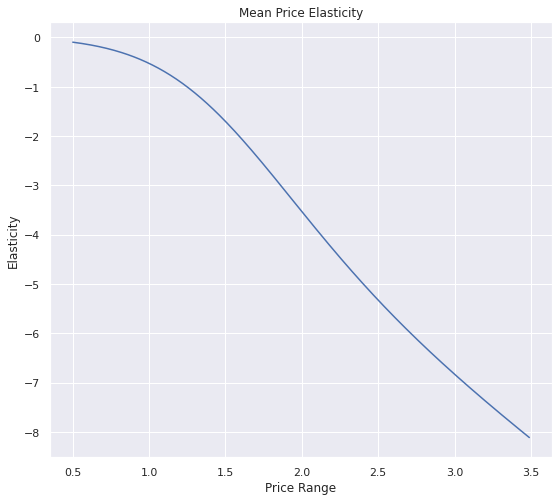

In [ ]:
# ploting on Mean PE
plt.figure(figsize=(9,8))
plt.plot(price_range, pe)
plt.xlabel('Price Range')
plt.ylabel('Elasticity')
plt.title('Mean Price Elasticity')
plt.show()

# Price Elasticity Segment wise
Computing price elasticity for wach segment and comparing them with Mean PE.

Model Coefficient for Segment 0 :  [[-1.50825039]]


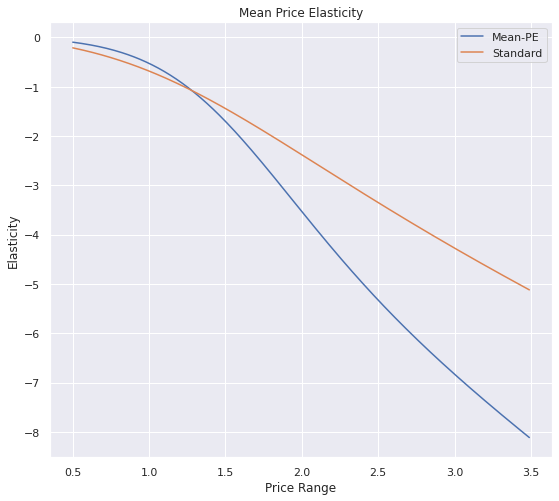

In [ ]:
# Segment 0
df_segment_0= df_purchase_predictors[df_purchase_predictors['Segment']==0]
Y=df_segment_0['Incidence']
x=pd.DataFrame()
x['Mean']=(df_segment_0['Price_1']+df_segment_0['Price_2']+df_segment_0['Price_3']+df_segment_0['Price_4']+df_segment_0['Price_5'])/5
model_purchase = LogisticRegression()
model_purchase.fit(x,Y)
print(f"Model Coefficient for Segment 0 : ",model_purchase.coef_)

#Predict Purchase Probability
y_predict= model_purchase.predict_proba(pd.DataFrame(df_price_range))
purchase_prob= y_predict[:,1]

# Compute price elasticity  E=beta*price*(1- Purchase Probability)
pe_segment_0=model_purchase.coef_[:,0]* (1- purchase_prob)*price_range

# Additing Segment PE to Dataframe
df_price_elasticity['PE of Segment 0']=pe_segment_0

# ploting on Mean PE
plt.figure(figsize=(9,8))
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment_0)
plt.xlabel('Price Range')
plt.ylabel('Elasticity')
plt.legend(['Mean-PE','Standard'])
plt.title('Mean Price Elasticity')
plt.show()




Model Coefficient for Segment 1 :  [[-1.71191219]]


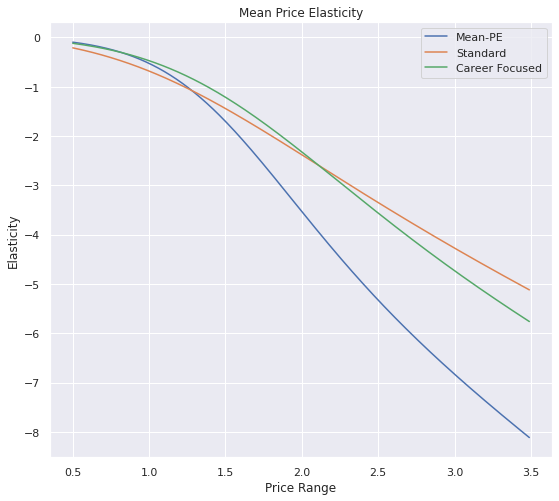

In [ ]:
# Segment 1
df_segment_1= df_purchase_predictors[df_purchase_predictors['Segment']==1]
Y=df_segment_1['Incidence']
x=pd.DataFrame()
x['Mean']=(df_segment_1['Price_1']+df_segment_1['Price_2']+df_segment_1['Price_3']+df_segment_1['Price_4']+df_segment_1['Price_5'])/5
model_purchase = LogisticRegression()
model_purchase.fit(x,Y)
print(f"Model Coefficient for Segment 1 : ",model_purchase.coef_)

#Predict Purchase Probability
y_predict= model_purchase.predict_proba(pd.DataFrame(df_price_range))
purchase_prob= y_predict[:,1]

# Compute price elasticity  E=beta*price*(1- Purchase Probability)
pe_segment_1=model_purchase.coef_[:,0]* (1- purchase_prob)*price_range

# Additing Segment PE to Dataframe
df_price_elasticity['PE of Segment 1']=pe_segment_1

# ploting on Mean PE
plt.figure(figsize=(9,8))
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment_0)
plt.plot(price_range, pe_segment_1)
plt.legend(['Mean-PE','Standard', 'Career Focused'])
plt.xlabel('Price Range')
plt.ylabel('Elasticity')
plt.title('Mean Price Elasticity')
plt.show()




Model Coefficient for Segment 2 :  [[-3.63986678]]


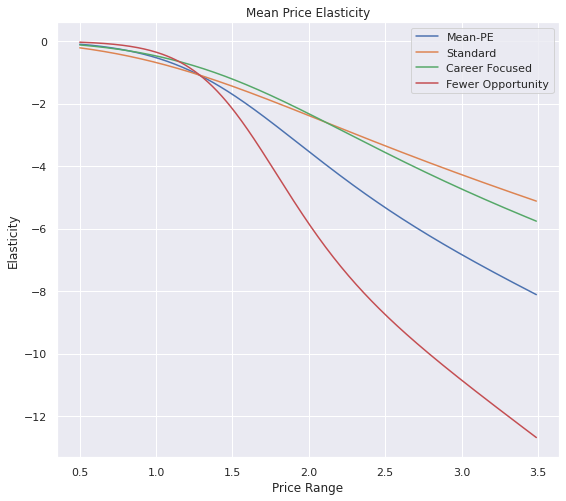

In [ ]:
# Segment 2
df_segment_2= df_purchase_predictors[df_purchase_predictors['Segment']==2]
Y=df_segment_2['Incidence']
x=pd.DataFrame()
x['Mean']=(df_segment_2['Price_1']+df_segment_2['Price_2']+df_segment_2['Price_3']+df_segment_2['Price_4']+df_segment_2['Price_5'])/5
model_purchase = LogisticRegression()
model_purchase.fit(x,Y)
print(f"Model Coefficient for Segment 2 : ",model_purchase.coef_)

#Predict Purchase Probability
y_predict= model_purchase.predict_proba(pd.DataFrame(df_price_range))
purchase_prob= y_predict[:,1]

# Compute price elasticity  E=beta*price*(1- Purchase Probability)
pe_segment_2=model_purchase.coef_[:,0]* (1- purchase_prob)*price_range

# Additing Segment PE to Dataframe
df_price_elasticity['PE of Segment 2']=pe_segment_2

# ploting on Mean PE
plt.figure(figsize=(9,8))
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment_0)
plt.plot(price_range, pe_segment_1)
plt.plot(price_range, pe_segment_2)
plt.legend(['Mean-PE','Standard', 'Career Focused', 'Fewer Opportunity'])
plt.xlabel('Price Range')
plt.ylabel('Elasticity')
plt.title('Mean Price Elasticity')
plt.show()


Model Coefficient for Segment 3 :  [[-1.24578907]]


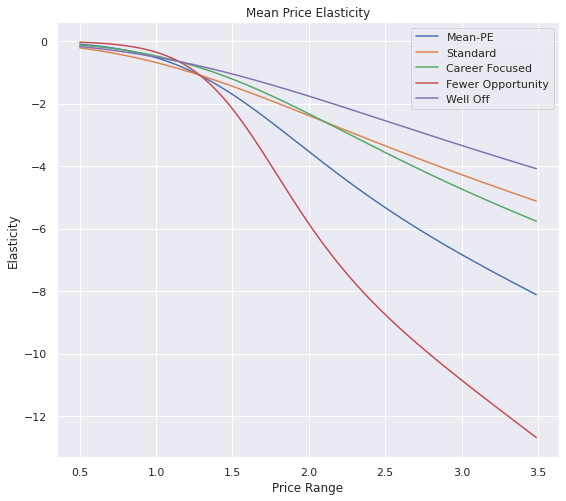

In [ ]:
# Segment 3
df_segment_3= df_purchase_predictors[df_purchase_predictors['Segment']==3]
Y=df_segment_3['Incidence']
x=pd.DataFrame()
x['Mean']=(df_segment_3['Price_1']+df_segment_3['Price_2']+df_segment_3['Price_3']+df_segment_3['Price_4']+df_segment_3['Price_5'])/5
model_purchase = LogisticRegression()
model_purchase.fit(x,Y)
print(f"Model Coefficient for Segment 3 : ",model_purchase.coef_)

#Predict Purchase Probability
y_predict= model_purchase.predict_proba(pd.DataFrame(df_price_range))
purchase_prob= y_predict[:,1]

# Compute price elasticity  E=beta*price*(1- Purchase Probability)
pe_segment_3=model_purchase.coef_[:,0]* (1- purchase_prob)*price_range

# Additing Segment PE to Dataframe
df_price_elasticity['PE of Segment 3']=pe_segment_3

# ploting on Mean PE
plt.figure(figsize=(9,8))
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment_0)
plt.plot(price_range, pe_segment_1)
plt.plot(price_range, pe_segment_2)
plt.plot(price_range, pe_segment_3)
plt.legend(['Mean-PE','Standard', 'Career Focused', 'Fewer Opportunity', 'Well Off'],)
plt.xlabel('Price Range')
plt.ylabel('Elasticity')
plt.title('Mean Price Elasticity')
plt.show()




# Purchase Probability based on the Promotion

For whole customer and segment wise.

## For the customers in general

In [ ]:
# Data Preparation
Y=df_purchase_predictors['Incidence']
x=pd.DataFrame()

x['Mean_Price']=(df_purchase_predictors['Price_1']+
                 df_purchase_predictors['Price_2']+
                 df_purchase_predictors['Price_3']+
                 df_purchase_predictors['Price_4']+
                 df_purchase_predictors['Price_5'])/5

x['Mean_Promotion']=(df_purchase_predictors['Promotion_1']+
                     df_purchase_predictors['Promotion_2']+
                     df_purchase_predictors['Promotion_3']+
                     df_purchase_predictors['Promotion_4']+
                     df_purchase_predictors['Promotion_5'])/5

# Model Estimation
model_incidence_promotion=LogisticRegression()
model_incidence_promotion.fit(x, Y)
print(f"Model Coefficient : ",model_incidence_promotion.coef_)

Model Coefficient :  [[-1.49402641  0.56152541]]


## Price Elasticity with Promotion

In [ ]:
#Predict Purchase Probability
df_pe_promotion=pd.DataFrame()
df_pe_promotion['Price']=price_range
df_pe_promotion['Promotion']=1
y_promotion_predict= model_incidence_promotion.predict_proba(df_pe_promotion)
purchase_prob= y_promotion_predict[:,1]

# Compute price elasticity  E=beta*price*(1- Purchase Probability)
pe_on_promotion=model_incidence_promotion.coef_[:,0]*price_range* (1- purchase_prob)

# Additing Segment PE to Dataframe
df_price_elasticity['PE on Promotion']=pe_on_promotion
df_price_elasticity.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


,Price Range,Mean_PE,PE of Segment 0,PE of Segment 1,PE of Segment 2,PE of Segment 3,PE on Promotion
0,0.50,-0.096396,-0.211169,-0.119088,-0.030921,-0.168042,-0.125732
1,0.51,-0.100464,-0.217739,-0.123271,-0.032688,-0.172967,-0.129848
2,0.52,-0.104659,-0.224417,-0.127548,-0.034541,-0.177962,-0.134043
3,0.53,-0.108984,-0.231204,-0.131919,-0.036486,-0.183027,-0.138318
4,0.54,-0.113442,-0.238099,-0.136386,-0.038526,-0.188165,-0.142674


# Price Elasticity with No Promotion




In [ ]:
#Predict Purchase Probability
df_pe_non_promotion=pd.DataFrame()
df_pe_non_promotion['Price']=price_range
df_pe_non_promotion['Promotion']=0
y_non_promotion_predict= model_incidence_promotion.predict_proba(df_pe_non_promotion)
purchase_prob= y_non_promotion_predict[:,1]

# Compute price elasticity  E=beta*price*(1- Purchase Probability)
pe_on_non_promotion=model_incidence_promotion.coef_[:,0]*price_range* (1- purchase_prob)

# Additing Segment PE to Dataframe
df_price_elasticity['PE on No-Promotion']=pe_on_non_promotion
df_price_elasticity.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


,Price Range,Mean_PE,PE of Segment 0,PE of Segment 1,PE of Segment 2,PE of Segment 3,PE on Promotion,PE on No-Promotion
0,0.50,-0.096396,-0.211169,-0.119088,-0.030921,-0.168042,-0.125732,-0.195644
1,0.51,-0.100464,-0.217739,-0.123271,-0.032688,-0.172967,-0.129848,-0.201765
2,0.52,-0.104659,-0.224417,-0.127548,-0.034541,-0.177962,-0.134043,-0.207989
3,0.53,-0.108984,-0.231204,-0.131919,-0.036486,-0.183027,-0.138318,-0.214316
4,0.54,-0.113442,-0.238099,-0.136386,-0.038526,-0.188165,-0.142674,-0.220747


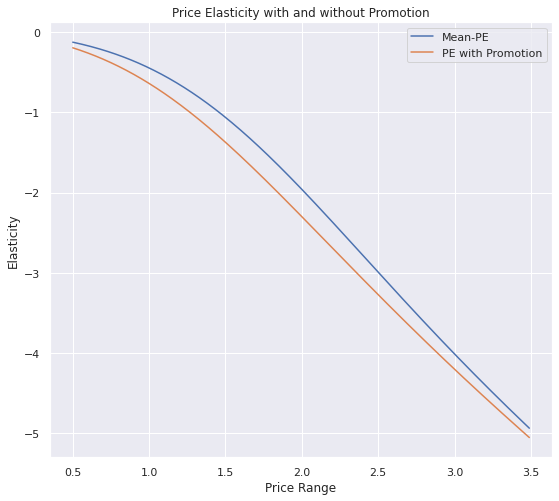

In [ ]:
# Visualise the promotion effect on PE
# ploting on Mean PE
plt.figure(figsize=(9,8))
plt.plot(price_range,pe_on_promotion )
plt.plot(price_range,pe_on_non_promotion)
plt.legend(['Mean-PE','PE with Promotion', 'PE without Promotion'])
plt.xlabel('Price Range')
plt.ylabel('Elasticity')
plt.title( 'Price Elasticity with and without Promotion')
plt.show()


In [ ]:
df_price_elasticity.to_csv('/content/drive/MyDrive/Retail/kmean_pca.pickleprice_elasticity')